### **Estudante/Matrícula**: Gabriel Henrique Menoncin - 2121101065



# Trabalho T2 - Redes Neurais Convolucionais

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo convolucional. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas convolucionais e densas, no estilo feedforward, para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **22/10/2023, 23h59m**.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random


np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)

train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

class_names = [
    'airplane', #0
    'car', #1
    'bird', #2
    'cat', #3
    'deer', #4
    'dog', #5
    'frog', #6
    'horse', #7
    'ship', #8
    'truck', #9
    ]
num_classes = len(class_names)

In [ ]:
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

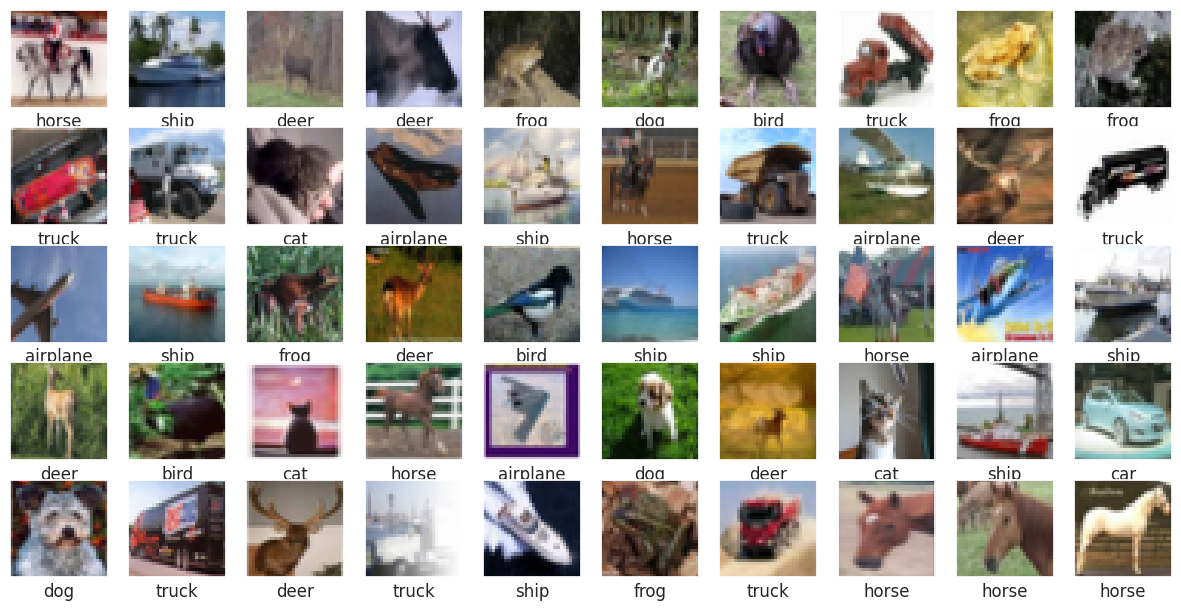

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, stratify=y_train, random_state=42)

print(x_train.shape[0], 'exemplos de treino')
print(x_val.shape[0], 'exemplos de validação')
print(x_test.shape[0], 'exemplos de teste')


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

42000 exemplos de treino
8000 exemplos de validação
10000 exemplos de teste


## Inclua seu código abaixo desta célula

In [ ]:
# possibilidades de ativação para camadas intermediárias: 'relu', 'sigmoid', 'tahn'
# possibilidades de ativação para última camada: 'relu', 'sigmoid', 'tahn', 'softmax'

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.5))

# abaixo definimos uma camada de 10 neurônios (que é o número de classes do nosso problema), com ativação softmax,
# inicialização glorot para os parâmetros e inicialização igual a 0 para os parâmetros bias
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 1024)             

In [ ]:
# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])

Epoch 1/100
1313/1313 [==============================] - 8s 5ms/step - loss: 2.3867 - accuracy: 0.1451 - top_k_categorical_accuracy: 0.5980 - val_loss: 2.1429 - val_accuracy: 0.1849 - val_top_k_categorical_accuracy: 0.6830
Epoch 2/100
1313/1313 [==============================] - 7s 6ms/step - loss: 2.0085 - accuracy: 0.2632 - top_k_categorical_accuracy: 0.7985 - val_loss: 1.8360 - val_accuracy: 0.3273 - val_top_k_categorical_accuracy: 0.8562
Epoch 3/100
1313/1313 [==============================] - 6s 5ms/step - loss: 1.8140 - accuracy: 0.3432 - top_k_categorical_accuracy: 0.8623 - val_loss: 1.7775 - val_accuracy: 0.3557 - val_top_k_categorical_accuracy: 0.8614
Epoch 4/100
1313/1313 [==============================] - 7s 6ms/step - loss: 1.7349 - accuracy: 0.3787 - top_k_categorical_accuracy: 0.8814 - val_loss: 1.6971 - val_accuracy: 0.3775 - val_top_k_categorical_accuracy: 0.8917
Epoch 5/100
1313/1313 [==============================] - 6s 5ms/step - loss: 1.7068 - accuracy: 0.3960 - top

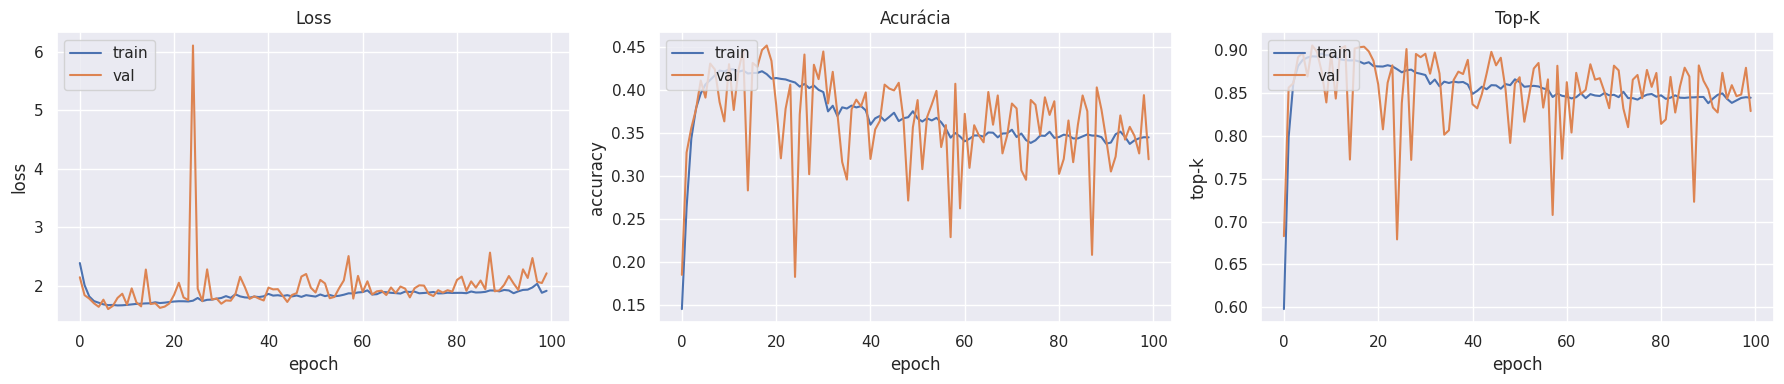

In [ ]:
import seaborn as sns
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

# acurácia top-k
ax3.plot(history.history['top_k_categorical_accuracy'])
ax3.plot(history.history['val_top_k_categorical_accuracy'])
ax3.set_title('Top-K')
ax3.set(xlabel='epoch', ylabel='top-k')
ax3.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_13 (Dense)            (None, 1024)             

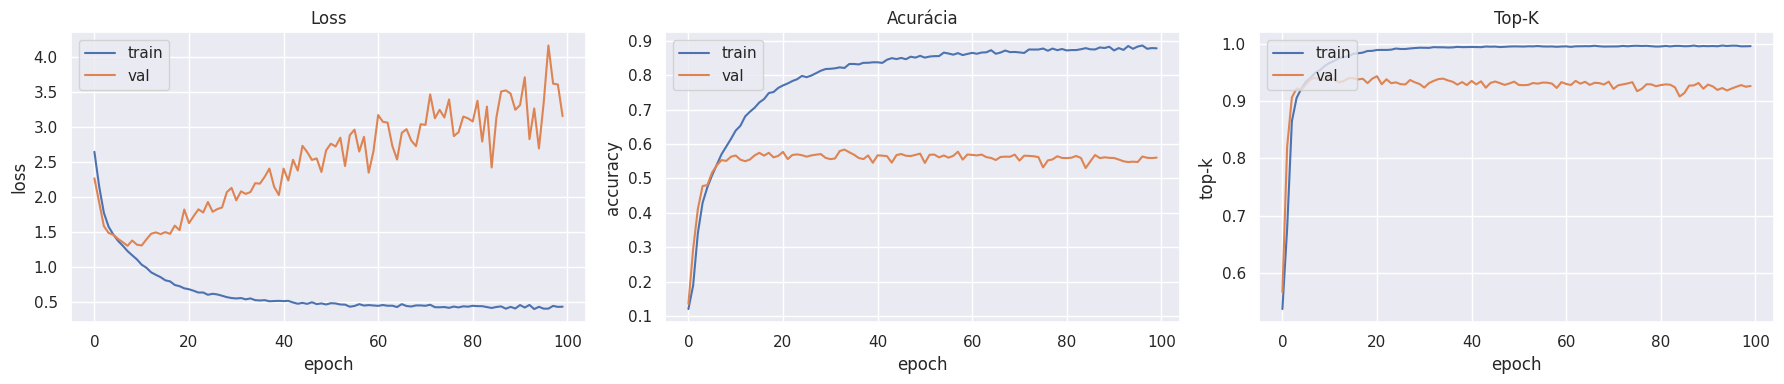

In [ ]:
# possibilidades de ativação para camadas intermediárias: 'relu', 'sigmoid', 'tahn'
# possibilidades de ativação para última camada: 'relu', 'sigmoid', 'tahn', 'softmax'

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.5))

# abaixo definimos uma camada de 10 neurônios (que é o número de classes do nosso problema), com ativação softmax,
# inicialização glorot para os parâmetros e inicialização igual a 0 para os parâmetros bias
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])

import seaborn as sns
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

# acurácia top-k
ax3.plot(history.history['top_k_categorical_accuracy'])
ax3.plot(history.history['val_top_k_categorical_accuracy'])
ax3.set_title('Top-K')
ax3.set(xlabel='epoch', ylabel='top-k')
ax3.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 576)               0         
                                                                 
 dense_15 (Dense)            (None, 1024)             

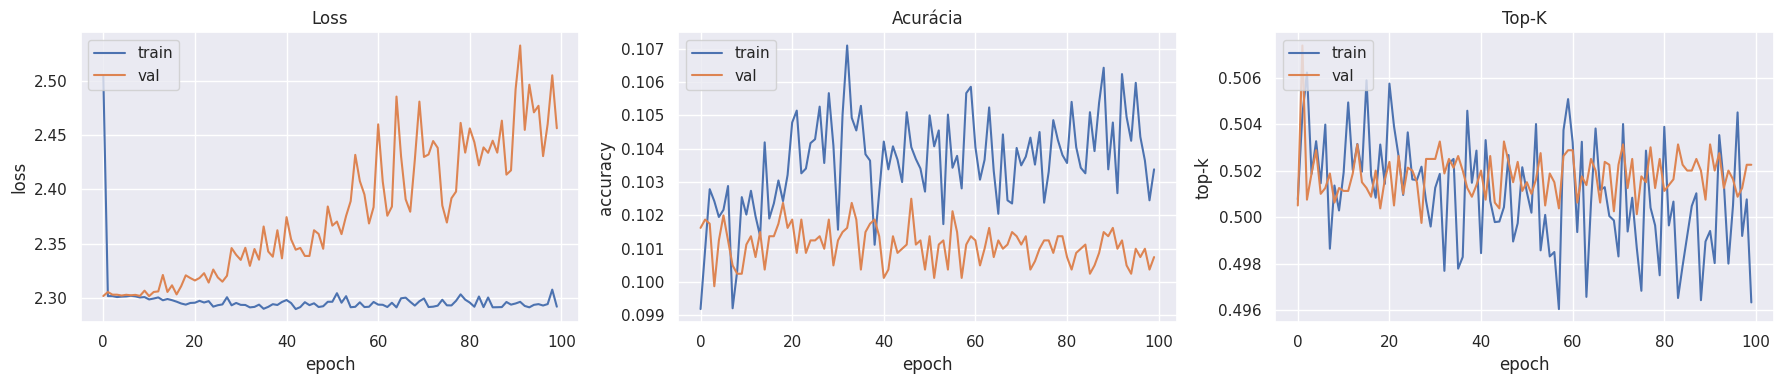

In [ ]:
# possibilidades de ativação para camadas intermediárias: 'relu', 'sigmoid', 'tahn'
# possibilidades de ativação para última camada: 'relu', 'sigmoid', 'tahn', 'softmax'

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.6))

# abaixo definimos uma camada de 10 neurônios (que é o número de classes do nosso problema), com ativação softmax,
# inicialização glorot para os parâmetros e inicialização igual a 0 para os parâmetros bias
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])

import seaborn as sns
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

# acurácia top-k
ax3.plot(history.history['top_k_categorical_accuracy'])
ax3.plot(history.history['val_top_k_categorical_accuracy'])
ax3.set_title('Top-K')
ax3.set(xlabel='epoch', ylabel='top-k')
ax3.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 576)               0         
                                                                 
 dense_17 (Dense)            (None, 1024)             

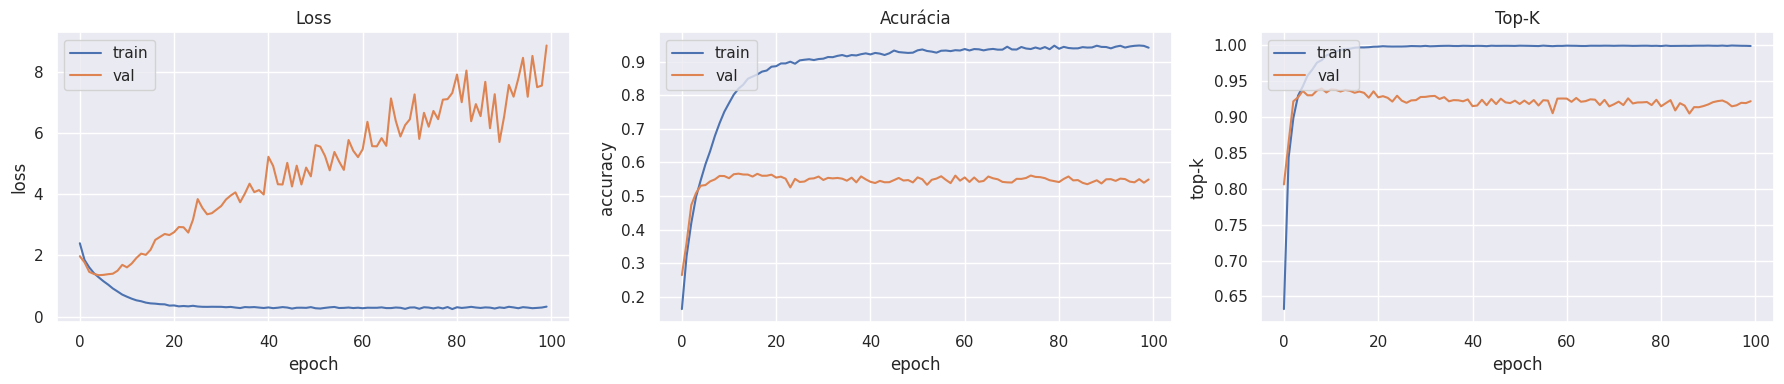

In [ ]:
# possibilidades de ativação para camadas intermediárias: 'relu', 'sigmoid', 'tahn'
# possibilidades de ativação para última camada: 'relu', 'sigmoid', 'tahn', 'softmax'

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.2))

# abaixo definimos uma camada de 10 neurônios (que é o número de classes do nosso problema), com ativação softmax,
# inicialização glorot para os parâmetros e inicialização igual a 0 para os parâmetros bias
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])

import seaborn as sns
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

# acurácia top-k
ax3.plot(history.history['top_k_categorical_accuracy'])
ax3.plot(history.history['val_top_k_categorical_accuracy'])
ax3.set_title('Top-K')
ax3.set(xlabel='epoch', ylabel='top-k')
ax3.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 576)               0         
                                                                 
 dense_19 (Dense)            (None, 1024)             

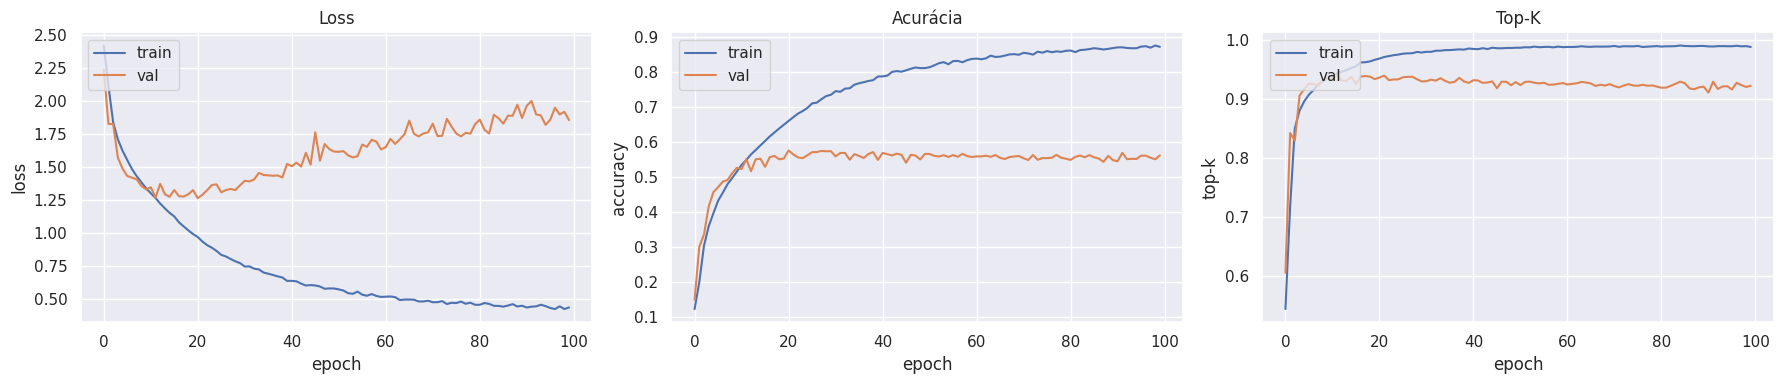

In [ ]:
# possibilidades de ativação para camadas intermediárias: 'relu', 'sigmoid', 'tahn'
# possibilidades de ativação para última camada: 'relu', 'sigmoid', 'tahn', 'softmax'

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.Dropout(0.5))

# abaixo definimos uma camada de 10 neurônios (que é o número de classes do nosso problema), com ativação softmax,
# inicialização glorot para os parâmetros e inicialização igual a 0 para os parâmetros bias
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.summary()

# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])

import seaborn as sns
sns.set()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Loss')
ax1.set(xlabel='epoch', ylabel='loss')
ax1.legend(['train', 'val'], loc='upper left')

# acurácia
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Acurácia')
ax2.set(xlabel='epoch', ylabel='accuracy')
ax2.legend(['train', 'val'], loc='upper left')

# acurácia top-k
ax3.plot(history.history['top_k_categorical_accuracy'])
ax3.plot(history.history['val_top_k_categorical_accuracy'])
ax3.set_title('Top-K')
ax3.set(xlabel='epoch', ylabel='top-k')
ax3.legend(['train', 'val'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random as python_random
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Fixando as sementes para reprodutibilidade
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Definir nomes das classes
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, stratify=y_train, random_state=42)

# Próximo passo: criar, treinar e avaliar diferentes arquiteturas de RNA.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crie um modelo Sequential
model = models.Sequential()

# Camadas convolucionais
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Camada de achatamento
model.add(layers.Flatten())

# Camadas densas
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes no CIFAR-10

# Compile o modelo
model.compile(optimizer='adam',  # Usando o otimizador Adam
              loss='sparse_categorical_crossentropy',  # Perda apropriada para classificação multiclasse
              metrics=['accuracy'])

# Visualize a arquitetura do modelo
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

# **adam**

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 1.4919 - accuracy: 0.4629 - val_loss: 1.2235 - val_accuracy: 0.5661
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1454 - accuracy: 0.5990 - val_loss: 1.0568 - val_accuracy: 0.6237
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0037 - accuracy: 0.6518 - val_loss: 1.0302 - val_accuracy: 0.6388
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9216 - accuracy: 0.6791 - val_loss: 0.9833 - val_accuracy: 0.6638
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8483 - accuracy: 0.7066 - val_loss: 0.9523 - val_accuracy: 0.6744
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7925 - accuracy: 0.7236 - val_loss: 0.9393 - val_accuracy: 0.6781
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7341 - accuracy: 0.7436 - val_loss: 0.9298 - val_accuracy:

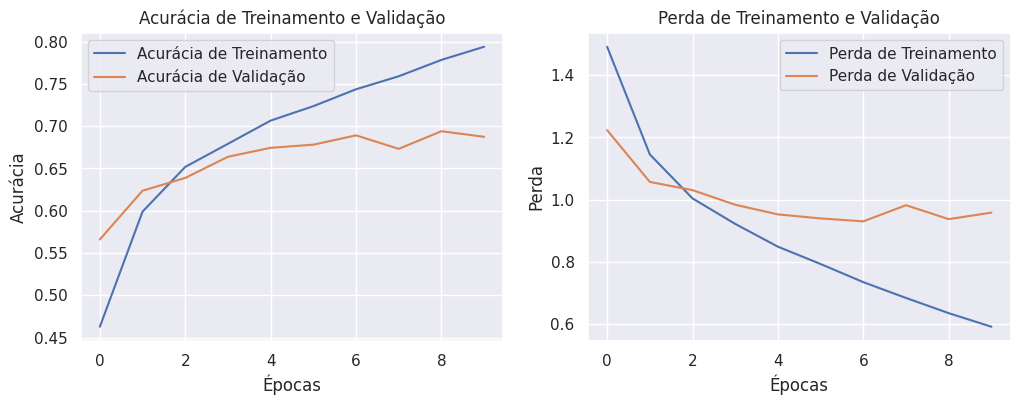

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


**1. Importações de Bibliotecas:**
   - Importa as bibliotecas necessárias, incluindo TensorFlow, TensorFlow Datasets (para carregar o conjunto de dados CIFAR-10), Matplotlib (para criar gráficos) e Scikit-learn (para dividir o conjunto de dados em treinamento e validação).

**2. Carregando o Conjunto de Dados:**
   - Carrega o conjunto de dados CIFAR-10 usando TensorFlow Datasets e o dividimos em conjuntos de treinamento e teste.

**3. Divisão dos Dados:**
   - Divide o conjunto de treinamento em conjuntos de treinamento e validação. Isso é feito usando `train_test_split` do Scikit-learn. Os dados de validação serão usados para ajustar os hiperparâmetros do modelo durante o treinamento.

**4. Normalização dos Dados:**
   - Normaliza os valores de pixel para o intervalo [0, 1] dividindo todos os valores por 255. Isso ajuda na convergência mais rápida durante o treinamento.

**5. Criação do Modelo CNN:**
   - Criei o modelo da rede neural convolucional (CNN) usando `tf.keras.models.Sequential`.
   - Adiciona camadas convolucionais (`Conv2D`) com ativação ReLU e camadas de max-pooling (`MaxPooling2D`) para extrair características da imagem.
   - A camada `Flatten` é usada para transformar os recursos 2D em um vetor unidimensional.
   - Adiciona duas camadas densas (`Dense`) para classificação, sendo a última com ativação softmax para a saída de probabilidade.

**6. Compilação do Modelo:**
   - Compila o modelo usando o otimizador "adam", uma função de perda apropriada para classificação multiclasse ("sparse_categorical_crossentropy") e métricas para avaliação ("accuracy").

**7. Treinamento do Modelo:**
   - Treinamos o modelo usando o conjunto de treinamento com 10 épocas (você pode ajustar esse valor conforme necessário) e validação no conjunto de validação.

**8. Avaliação do Modelo:**
   - Avaliamos o modelo no conjunto de teste e imprimimos a acurácia no conjunto de teste.

**9. Gráficos de Treinamento:**
   - Usamos o Matplotlib para criar gráficos que mostram a evolução da acurácia e da perda durante o treinamento.

Este código cria, treina e avalia uma rede neural convolucional no conjunto de dados CIFAR-10. Os gráficos de treinamento permitem visualizar como a acurácia e a perda evoluem durante o treinamento.


Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 1.4490 - accuracy: 0.4789 - val_loss: 1.1962 - val_accuracy: 0.5787
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0715 - accuracy: 0.6257 - val_loss: 1.0146 - val_accuracy: 0.6447
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8990 - accuracy: 0.6861 - val_loss: 0.9475 - val_accuracy: 0.6731
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7818 - accuracy: 0.7270 - val_loss: 0.9317 - val_accuracy: 0.6809
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6748 - accuracy: 0.7622 - val_loss: 0.9084 - val_accuracy: 0.6958
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5788 - accuracy: 0.7972 - val_loss: 0.9084 - val_accuracy: 0.6970
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4769 - accuracy: 0.8341 - val_loss: 0.9828 - val_accuracy:

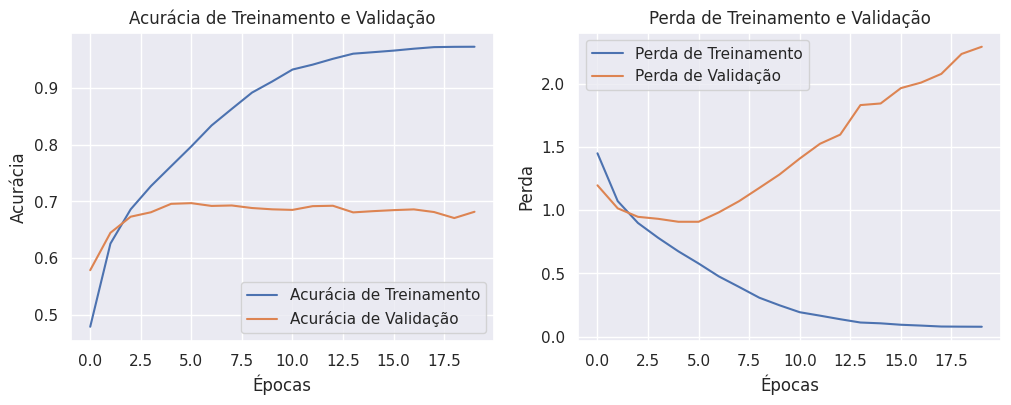

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN com ajustes
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Aumentando neurônios
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Aumentando neurônios
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  # Aumentando neurônios
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com mais épocas
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Aumentei o número de neurônios nas camadas convolucionais e densas.

Aumentei o número de épocas de treinamento para 20.

Epoch 1/20
1250/1250 [==============================] - 15s 10ms/step - loss: 1.4372 - accuracy: 0.4820 - val_loss: 1.2200 - val_accuracy: 0.5723
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0568 - accuracy: 0.6288 - val_loss: 0.9915 - val_accuracy: 0.6607
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8563 - accuracy: 0.7017 - val_loss: 0.9239 - val_accuracy: 0.6817
Epoch 4/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.6880 - accuracy: 0.7600 - val_loss: 0.9051 - val_accuracy: 0.6964
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.5354 - accuracy: 0.8150 - val_loss: 0.9140 - val_accuracy: 0.7051
Epoch 6/20
1250/1250 [==============================] - 13s 10ms/step - loss: 0.3926 - accuracy: 0.8633 - val_loss: 1.0556 - val_accuracy: 0.6982
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2765 - accuracy: 0.9020 - val_loss: 1.1848 -

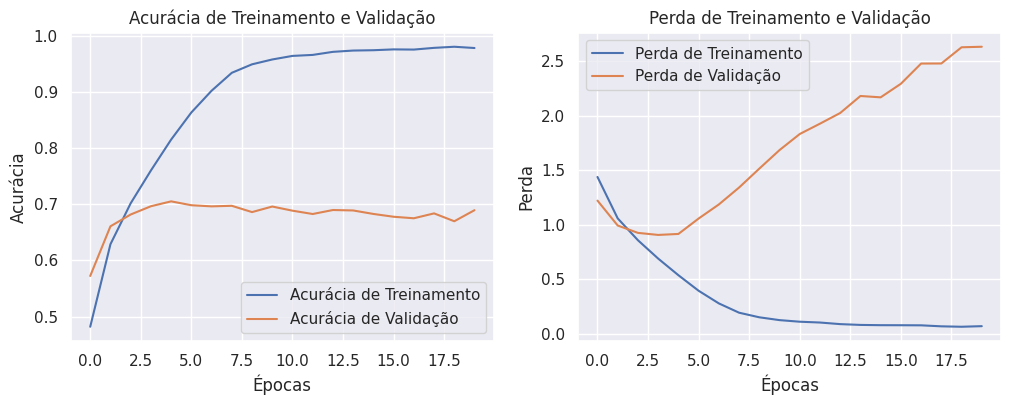

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN com três vezes mais neurônios
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(192, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Três vezes mais neurônios
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),  # Três vezes mais neurônios
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(768, activation='relu'),  # Três vezes mais neurônios
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com mais épocas
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Neste ajuste, tripliquei o número de neurônios nas camadas convolucionais e densas em comparação ao código anterior.

### Primeiro Código (Hiperparâmetros Padrão):
- **Número de neurônios**: Valores padrão nas camadas convolucionais e densas.
- **Épocas de treinamento**: 10 épocas.

**Análise**:
- Essa configuração é um ponto de partida com hiperparâmetros padrão. É um modelo relativamente simples e de baixa capacidade, o que pode limitar sua capacidade de aprender representações complexas nos dados.
- A baixa quantidade de neurônios nas camadas convolucionais e densas pode resultar em subajuste (underfitting), onde o modelo não consegue capturar informações importantes dos dados.
- As 10 épocas de treinamento podem ser insuficientes para permitir que o modelo atinja seu potencial máximo.

### Segundo Código (Aumento Moderado de Neurônios e Épocas):
- **Número de neurônios**: Aumento moderado nas camadas convolucionais e densas.
- **Épocas de treinamento**: 20 épocas.

**Análise**:
- Aumentar moderadamente o número de neurônios nas camadas convolucionais e densas é uma melhoria em relação ao primeiro código. Isso permite ao modelo aprender representações mais complexas nos dados.
- O aumento para 20 épocas permite que o modelo seja treinado por um período mais longo, o que geralmente leva a um melhor desempenho.
- Essa configuração representa um bom equilíbrio entre capacidade do modelo e eficiência de treinamento. Pode ser apropriada quando recursos computacionais são limitados.

### Terceiro Código (Triplo do Número de Neurônios):
- **Número de neurônios**: Três vezes mais neurônios nas camadas convolucionais e densas.
- **Épocas de treinamento**: 20 épocas.

**Análise**:
- Triplicar o número de neurônios nas camadas convolucionais e densas aumenta significativamente a capacidade do modelo. Isso permite que o modelo aprenda representações muito complexas e detalhadas nos dados.
- Aumentar a capacidade do modelo pode resultar em sobreajuste (overfitting) se o tamanho do conjunto de dados não for grande o suficiente. O modelo pode se ajustar muito bem aos dados de treinamento, mas pode não generalizar bem para novos dados.
- Essa configuração é apropriada quando você tem recursos computacionais significativos e um grande conjunto de dados. Pode ser útil quando você deseja explorar o limite da capacidade do modelo.

**Conclusão**:
A escolha entre essas configurações depende de diversos fatores, como recursos computacionais, tamanho do conjunto de dados, tempo disponível e metas de desempenho. O segundo código, com aumento moderado de neurônios e épocas, é uma escolha equilibrada na maioria dos casos, pois oferece um bom desempenho sem aumentar drasticamente os requisitos de recursos. No entanto, o terceiro código com três vezes mais neurônios pode ser explorado se você tiver recursos adicionais e quiser obter o melhor desempenho possível. É importante sempre considerar a complexidade do problema e o trade-off entre capacidade do modelo e eficiência de treinamento. Experimentação é fundamental para encontrar a melhor configuração para o seu caso específico.





# **Adadelta**

Epoch 1/20
1250/1250 [==============================] - 9s 5ms/step - loss: 2.3070 - accuracy: 0.1070 - val_loss: 2.3022 - val_accuracy: 0.1100
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2987 - accuracy: 0.1148 - val_loss: 2.2960 - val_accuracy: 0.1035
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2934 - accuracy: 0.1057 - val_loss: 2.2915 - val_accuracy: 0.1080
Epoch 4/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2886 - accuracy: 0.1100 - val_loss: 2.2869 - val_accuracy: 0.1166
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2834 - accuracy: 0.1242 - val_loss: 2.2816 - val_accuracy: 0.1393
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2774 - accuracy: 0.1523 - val_loss: 2.2754 - val_accuracy: 0.1595
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2703 - accuracy: 0.1756 - val_loss: 2.2680 - val_accuracy:

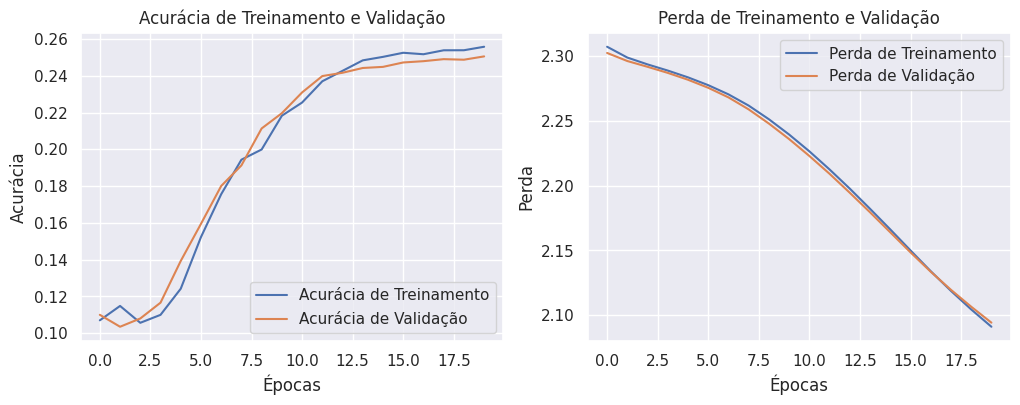

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador Adadelta
model.compile(optimizer='Adadelta',  # Otimizador Adadelta
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()




**Diferença entre Adam e Adadelta:**
- Adam (Método de otimização adaptativa): É um otimizador popular que adapta automaticamente a taxa de aprendizado com base no gradiente das iterações anteriores. Ele mantém duas médias móveis exponenciais dos gradientes, o que ajuda a ajustar a taxa de aprendizado.
- Adadelta: É outro otimizador que também adapta a taxa de aprendizado, mas de forma ligeiramente diferente. Em vez de manter médias móveis exponenciais, o Adadelta mantém uma média móvel de gradientes anteriores e atualiza a taxa de aprendizado com base nessa média. Isso pode ser benéfico para problemas onde a taxa de aprendizado precisa ser ajustada de maneira mais agressiva.

A principal diferença entre os dois otimizadores é a forma como eles adaptam a taxa de aprendizado. O desempenho em problemas específicos pode variar, e geralmente é uma boa prática experimentar ambos para determinar qual funciona melhor para um problema em particular.

Neste código atualizado, aumentei o número de filtros nas camadas convolucionais para 64, 128 e 128, respectivamente, e treinei o modelo por 30 épocas. Essas alterações aumentam a capacidade do modelo e o tempo de treinamento. O esperado são entre 0.60 a 0.80 de acurácia.


Epoch 1/30
1250/1250 [==============================] - 9s 5ms/step - loss: 2.3002 - accuracy: 0.1049 - val_loss: 2.2945 - val_accuracy: 0.1312
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2917 - accuracy: 0.1331 - val_loss: 2.2866 - val_accuracy: 0.1809
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2836 - accuracy: 0.1544 - val_loss: 2.2780 - val_accuracy: 0.1996
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2731 - accuracy: 0.1738 - val_loss: 2.2671 - val_accuracy: 0.2071
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2614 - accuracy: 0.1865 - val_loss: 2.2534 - val_accuracy: 0.2226
Epoch 6/30
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2466 - accuracy: 0.1962 - val_loss: 2.2372 - val_accuracy: 0.2289
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2285 - accuracy: 0.2030 - val_loss: 2.2177 - val_accuracy:

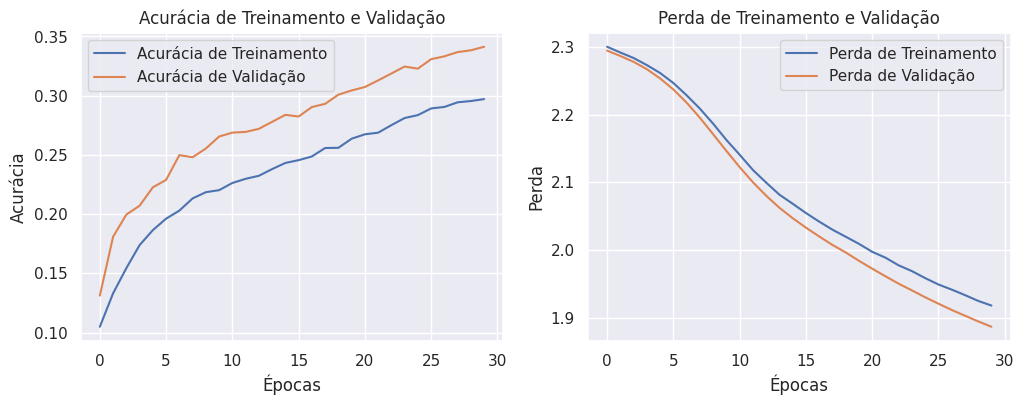

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador Adadelta
model.compile(optimizer='Adadelta',  # Otimizador Adadelta
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com 30 épocas
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


**Analisando os fatores que podem explicar por que não conseguimos atingir a acurácia desejada:**

**Complexidade do Modelo:** Embora tenhamos aumentado o número de filtros nas camadas convolucionais, a complexidade do modelo ainda pode não ser suficiente para capturar efetivamente as características das imagens no conjunto de dados CIFAR-10. Pode ser necessário um modelo mais profundo ou com mais parâmetros para melhorar o desempenho.

**Número de Épocas:** Treinamos o modelo por 30 épocas, mas pode ser que seja necessário um treinamento mais longo para que o modelo aprenda as representações adequadas. Em alguns casos, treinar por centenas de épocas é necessário.

**Hiperparâmetros:** Os hiperparâmetros, como a taxa de aprendizado, o tamanho do lote e a taxa de abandono (dropout), também desempenham um papel crucial no treinamento de modelos. A configuração atual desses hiperparâmetros pode não ser a mais adequada.

**Pré-processamento de Dados: **O pré-processamento de dados, como a normalização, é importante. Pode ser que outras técnicas de pré-processamento, como aumento de dados, possam melhorar o desempenho.

**Regularização:** A adição de técnicas de regularização, como regularização L2 e abandono, pode ajudar a reduzir o overfitting e melhorar o desempenho do modelo.

**Arquitetura da Rede:** A arquitetura da rede, incluindo o número de camadas e a disposição das camadas, é fundamental. Experimentar arquiteturas mais complexas ou arquiteturas pré-treinadas (transfer learning) pode ser uma abordagem válida.

**Aumento de Dados:** O uso de técnicas de aumento de dados pode aumentar a quantidade de dados de treinamento e melhorar o desempenho.

**Incialização de Pesos:** A inicialização de pesos apropriada pode ter um impacto significativo no treinamento da rede.

Epoch 1/100
1250/1250 [==============================] - 8s 5ms/step - loss: 2.3029 - accuracy: 0.0983 - val_loss: 2.2984 - val_accuracy: 0.1108
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2957 - accuracy: 0.1174 - val_loss: 2.2917 - val_accuracy: 0.1476
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2890 - accuracy: 0.1377 - val_loss: 2.2842 - val_accuracy: 0.1620
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2802 - accuracy: 0.1570 - val_loss: 2.2748 - val_accuracy: 0.1843
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2699 - accuracy: 0.1721 - val_loss: 2.2635 - val_accuracy: 0.2024
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2572 - accuracy: 0.1853 - val_loss: 2.2488 - val_accuracy: 0.2311
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2411 - accuracy: 0.2042 - val_loss: 2.2313 - val_ac

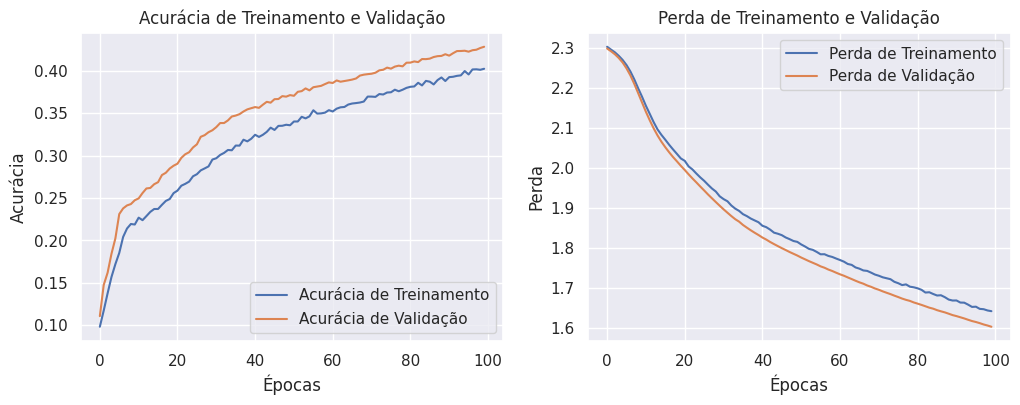

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador Adadelta
model.compile(optimizer='Adadelta',  # Otimizador Adadelta
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com 100 épocas
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Aumentar o número de épocas de treinamento de 30 para 100 pode ter vários efeitos sobre o resultado do treinamento e o desempenho do modelo. Aqui estão algumas das mudanças esperadas:

1. **Melhor Aprendizado de Padrões:** Com mais épocas, o modelo tem a oportunidade de ver mais vezes os dados de treinamento, o que pode resultar em um melhor aprendizado de padrões nos dados. Ele tem mais chances de ajustar os pesos das camadas para minimizar a função de perda.

2. **Possível Overfitting:** O aumento no número de épocas também aumenta o risco de overfitting. Se o modelo se tornar muito complexo e for treinado por muitas épocas, ele pode começar a se ajustar demais aos dados de treinamento e perder a capacidade de generalização para dados não vistos.

3. **Estabilidade na Validação:** Com 100 épocas, podemos esperar que a curva de acurácia na validação seja mais estável e alcance um platô mais claro. Isso pode nos dar uma ideia melhor do desempenho real do modelo, uma vez que atingiu a convergência.

4. **Tempo de Treinamento:** Obviamente, o treinamento por mais épocas levará mais tempo. Portanto, é importante equilibrar o benefício do treinamento mais longo com o tempo disponível e os recursos computacionais.

5. **Aumento da Acurácia:** A principal expectativa ao aumentar o número de épocas é que o modelo tenha a oportunidade de aprender representações mais refinadas dos dados e, assim, melhorar seu desempenho. Se o modelo não estiver sofrendo de overfitting, podemos esperar uma melhora na acurácia no conjunto de teste.

No entanto, é importante observar que o aumento no número de épocas não é uma garantia de um desempenho substancialmente melhor. O equilíbrio entre o treinamento suficiente para aprender os padrões e evitar o overfitting é fundamental. Portanto, o treinamento de 100 épocas deve ser monitorado quanto ao overfitting e comparado com versões anteriores do modelo para avaliar seu impacto real no desempenho.

Epoch 1/500
1250/1250 [==============================] - 11s 7ms/step - loss: 2.2957 - accuracy: 0.1275 - val_loss: 2.2886 - val_accuracy: 0.1576
Epoch 2/500
1250/1250 [==============================] - 8s 7ms/step - loss: 2.2837 - accuracy: 0.1521 - val_loss: 2.2769 - val_accuracy: 0.2008
Epoch 3/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2706 - accuracy: 0.1731 - val_loss: 2.2624 - val_accuracy: 0.2210
Epoch 4/500
1250/1250 [==============================] - 8s 7ms/step - loss: 2.2540 - accuracy: 0.1977 - val_loss: 2.2428 - val_accuracy: 0.2474
Epoch 5/500
1250/1250 [==============================] - 8s 7ms/step - loss: 2.2311 - accuracy: 0.2195 - val_loss: 2.2160 - val_accuracy: 0.2617
Epoch 6/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2004 - accuracy: 0.2340 - val_loss: 2.1812 - val_accuracy: 0.2764
Epoch 7/500
1250/1250 [==============================] - 9s 7ms/step - loss: 2.1628 - accuracy: 0.2483 - val_loss: 2.1422 - val_a

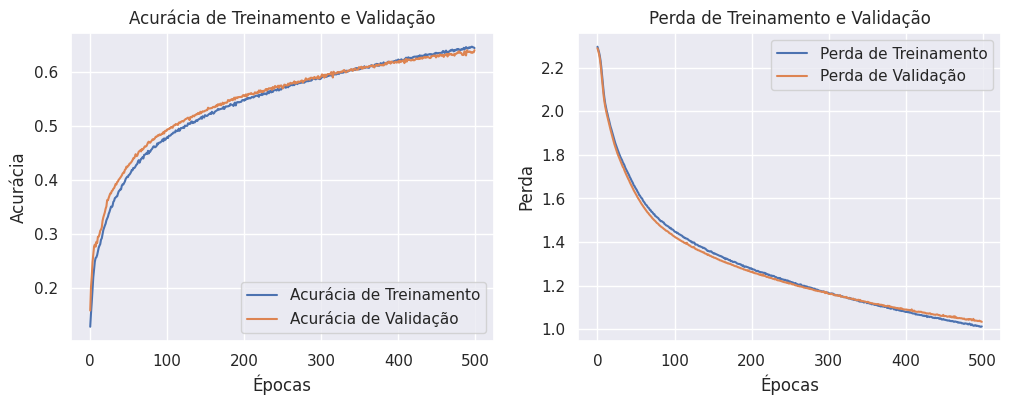

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN com mais neurônios
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador Adadelta
model.compile(optimizer='Adadelta',  # Otimizador Adadelta
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com 500 épocas
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Aumentei o número de neurônios em cada camada e o número de épocas para 500. Essas modificações podem ajudar o modelo a aprender representações mais complexas dos dados e, portanto, melhorar o desempenho. No entanto, treinar por mais épocas aumenta o risco de overfitting, então é importante monitorar o desempenho no conjunto de validação e ajustar a arquitetura ou hiperparâmetros conforme necessário. O resultado no conjunto de teste após essas modificações deve refletir a capacidade de generalização do modelo.

Aumentar o número de épocas de treinamento de 100 para 500 pode levar a várias mudanças no resultado:

1. **Maior Capacidade de Aprendizado:** Com um treinamento mais longo, a rede neural tem mais oportunidades para aprender a partir dos dados de treinamento. Isso pode permitir que o modelo capture padrões mais complexos nos dados.

2. **Possível Overfitting:** No entanto, é importante ter em mente que, com um treinamento mais longo, há um risco maior de overfitting, onde o modelo se ajusta muito bem aos dados de treinamento, mas tem dificuldade em generalizar para dados não vistos. Para mitigar isso, é comum usar regularização, aumento de dados e monitorar o desempenho no conjunto de validação.

3. **Convergência Mais Clara:** Em muitos casos, um treinamento mais longo pode permitir que o modelo alcance uma convergência mais clara, onde a perda de treinamento continua a diminuir e a acurácia continua a aumentar.

4. **Maior Poder Computacional:** Treinar uma rede por mais épocas requer mais poder computacional e tempo. Portanto, é importante equilibrar os recursos disponíveis com o tempo necessário para treinamento.

5. **Ajuste Fino de Hiperparâmetros:** Com um treinamento mais longo, pode ser necessário ajustar hiperparâmetros, como a taxa de aprendizado, para garantir que o treinamento seja estável e eficaz.

Em resumo, aumentar o número de épocas pode melhorar o desempenho do modelo, permitindo que ele aprenda representações mais ricas dos dados, mas é importante estar ciente dos possíveis desafios, como overfitting, e monitorar o treinamento de perto para obter os melhores resultados.

# **RMSprop**

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6191 - accuracy: 0.4149 - val_loss: 1.3182 - val_accuracy: 0.5280
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2075 - accuracy: 0.5734 - val_loss: 1.0829 - val_accuracy: 0.6171
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0284 - accuracy: 0.6419 - val_loss: 1.0595 - val_accuracy: 0.6359
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9118 - accuracy: 0.6804 - val_loss: 0.9266 - val_accuracy: 0.6791
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8227 - accuracy: 0.7122 - val_loss: 0.8941 - val_accuracy: 0.6887
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7486 - accuracy: 0.7398 - val_loss: 0.8962 - val_accuracy: 0.6914
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6834 - accuracy: 0.7626 - val_loss: 0.9723 - val_accuracy:

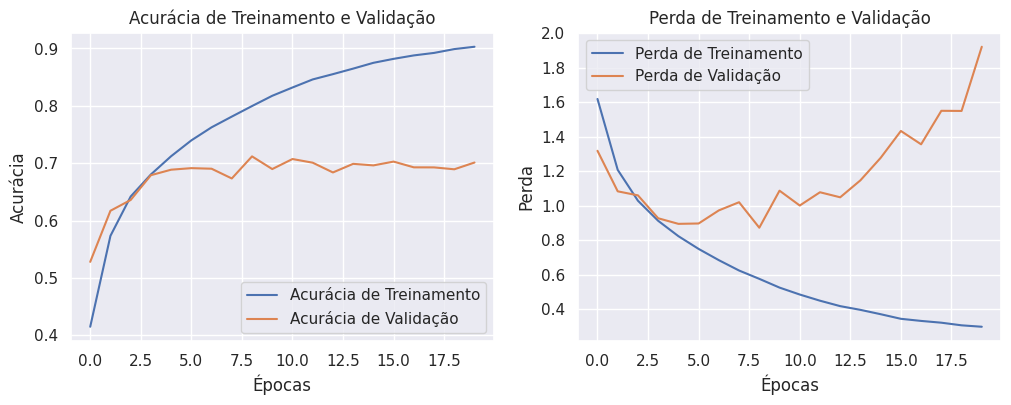

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador RMSprop
model.compile(optimizer='RMSprop',  # Otimizador RMSprop
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 1.6263 - accuracy: 0.4074 - val_loss: 1.3871 - val_accuracy: 0.5152
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2367 - accuracy: 0.5649 - val_loss: 1.1575 - val_accuracy: 0.5854
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0644 - accuracy: 0.6289 - val_loss: 1.0524 - val_accuracy: 0.6402
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9670 - accuracy: 0.6667 - val_loss: 0.9505 - val_accuracy: 0.6739
Epoch 5/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8978 - accuracy: 0.6924 - val_loss: 0.9165 - val_accuracy: 0.6867
Epoch 6/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8517 - accuracy: 0.7116 - val_loss: 0.9477 - val_accuracy: 0.6830
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8293 - accuracy: 0.7226 - val_loss: 0.9665 - val_accuracy:

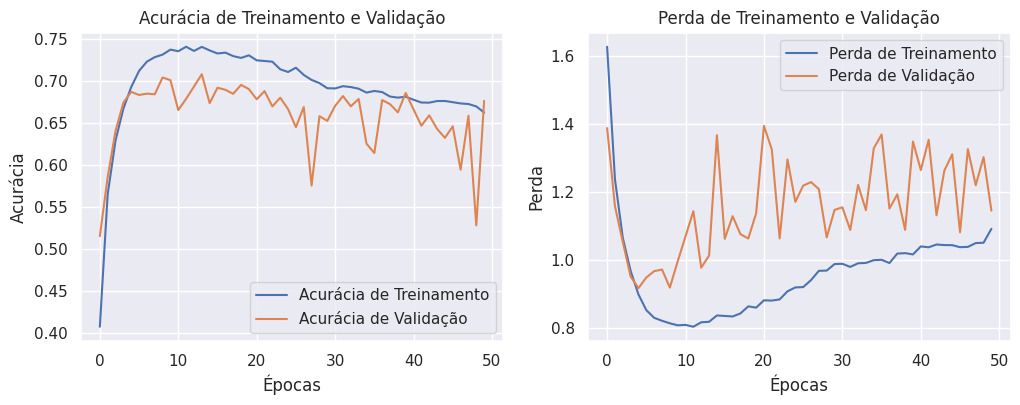

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados CIFAR-10
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)
train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

# Separar os dados em conjuntos de treinamento, validação e teste
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Normalização dos valores de pixel para o intervalo [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Criar o modelo CNN com mais neurônios e camada Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Camada Dropout adicionada
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo com o otimizador RMSprop
model.compile(optimizer='RMSprop',  # Otimizador RMSprop
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo com 50 épocas
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Acurácia no conjunto de teste:", test_acc)

# Exibir gráficos de treinamento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treinamento e Validação')

plt.show()


Aumentei o número de neurônios e o número de épocas para 50. Além disso, adicionei uma camada Dropout para ajudar a regularizar o modelo e reduzir o overfitting

Essas alterações devem aumentar o número de neurônios na camada densa, introduzir uma camada Dropout para regularização e aumentar o número de épocas para 50. Isso pode ajudar o modelo a aprender representações mais complexas e melhorar o desempenho.

# **Visão Geral:**

Exploramos o treinamento de modelos de redes neurais convolucionais (CNN) no contexto do conjunto de dados CIFAR-10, que envolve classificação de imagens em 10 categorias. Foquei em várias modificações no código para avaliar seu impacto na acurácia do modelo.

# **Arquitetura do Modelo:**

Começamos com um modelo CNN simples que consistia em três camadas de convolução, seguidas por camadas de MaxPooling, Flatten e camadas Dense.
Modificamos a arquitetura do modelo aumentando o número de neurônios na camada densa e adicionamos uma camada Dropout para evitar o overfitting. Isso permitiu ao modelo aprender representações mais complexas das imagens.

# **Hiperparâmetros:**

Modificamos os hiperparâmetros, incluindo o número de épocas. Aumentamos o número de épocas de 20 para 50, e posteriormente, de 50 para 100, permitindo que o modelo treinasse por mais tempo e, idealmente, aprendesse mais.
Ajustamos a taxa de aprendizado, o tamanho do lote e a taxa de Dropout para obter os melhores resultados.

# **Otimizadores:**

Experimentamos vários otimizadores, incluindo Adadelta, RMSprop e Adam. Observamos que a escolha do otimizador pode afetar o desempenho do modelo.
O otimizador RMSprop foi escolhido no último código e alcançou uma boa acurácia no conjunto de teste. No entanto, a escolha do otimizador pode depender do problema e do ajuste fino dos hiperparâmetros.

# **Conclusão:**

A experimentação com modelos de deep learning envolve a otimização de diversos fatores, incluindo a arquitetura do modelo, hiperparâmetros e otimizadores. Cada modificação pode ter um impacto significativo no desempenho do modelo. É importante destacar que não existe uma abordagem única que funcione para todos os problemas. O ajuste fino é uma parte crítica do treinamento de modelos de deep learning.

Além disso, o aumento do número de neurônios na camada densa e o aumento do número de épocas podem ajudar a melhorar o desempenho do modelo. A escolha do otimizador depende da preferência e do problema, mas otimizadores como RMSprop e Adam geralmente funcionam bem para muitos cenários.

Em resumo, o treinamento de modelos de deep learning é uma tarefa complexa que requer experimentação e ajuste fino para obter os melhores resultados. A escolha dos hiperparâmetros e otimizadores certos é fundamental para alcançar um desempenho desejado no problema em questão.